In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import seaborn as sns
import kaggle

In [5]:
!kaggle datasets download -d arshkon/linkedin-job-postings

Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
License(s): CC-BY-SA-4.0
 76%|██████████████████████████████▏         | 120M/159M [00:00<00:00, 1.26GB/s]
100%|████████████████████████████████████████| 159M/159M [00:00<00:00, 1.27GB/s]


In [7]:
!unzip /workspaces/ITCS6190-Course-Project/spark-analytics/linkedin-job-postings.zip -d /workspaces/ITCS6190-Course-Project/data

Archive:  /workspaces/ITCS6190-Course-Project/spark-analytics/linkedin-job-postings.zip
  inflating: /workspaces/ITCS6190-Course-Project/data/companies/companies.csv  


  inflating: /workspaces/ITCS6190-Course-Project/data/companies/company_industries.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/companies/company_specialities.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/companies/employee_counts.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/jobs/benefits.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/jobs/job_industries.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/jobs/job_skills.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/jobs/salaries.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/mappings/industries.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/mappings/skills.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/postings.csv  


# Company Industries

In [8]:
company_ind = pd.read_csv("/workspaces/ITCS6190-Course-Project/data/companies/company_industries.csv")
display(company_ind.info(),
        company_ind.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375 entries, 0 to 24374
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  24375 non-null  int64 
 1   industry    24375 non-null  object
dtypes: int64(1), object(1)
memory usage: 381.0+ KB


None

,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting


In [25]:
company_ind['company_id'].value_counts()

company_id
69192017    2
87089640    2
4721        2
2471716     2
2831596     2
           ..
9183828     1
165970      1
1685110     1
71324763    1
10793       1
Name: count, Length: 24365, dtype: int64

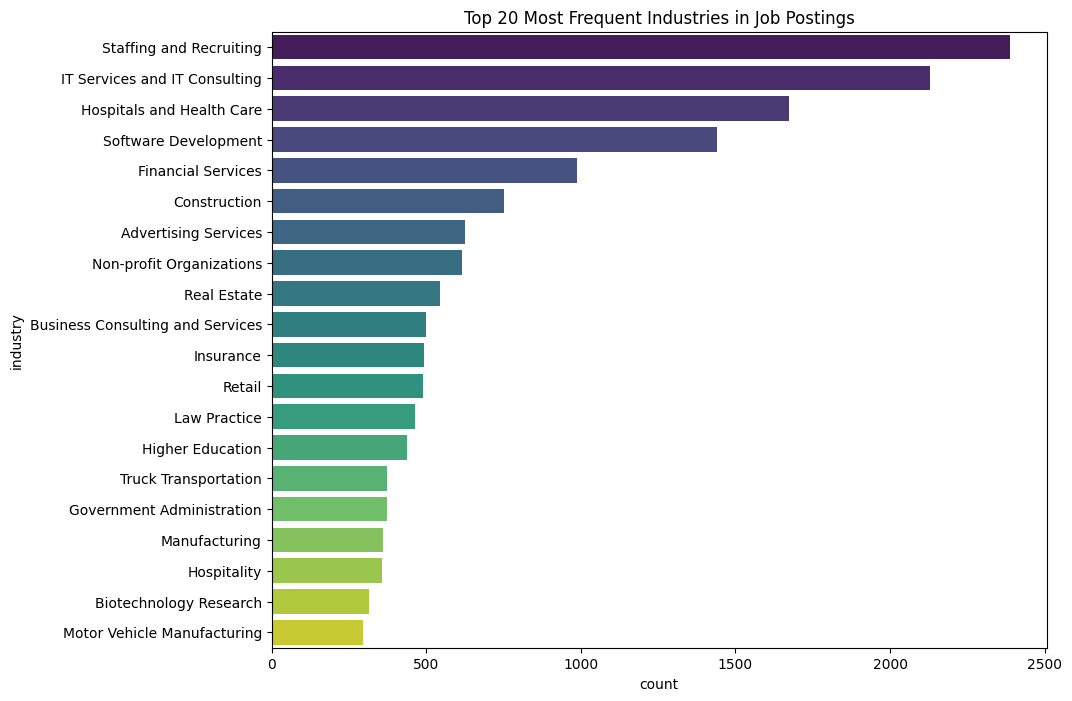

In [22]:
ind_freq = company_ind["industry"].value_counts().to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(ind_freq.iloc[:20,:], x="count", y="industry", hue="industry", palette="viridis",)
plt.title("Top 20 Most Frequent Industries in Job Postings")
plt.show()

# Company Specialities 

In [23]:
comp_spl = pd.read_csv("/workspaces/ITCS6190-Course-Project/data/companies/company_specialities.csv")
display(comp_spl.info(), comp_spl.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169387 entries, 0 to 169386
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   company_id  169387 non-null  int64 
 1   speciality  169387 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


None

,company_id,speciality
0,22292832,window replacement
1,22292832,patio door replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage


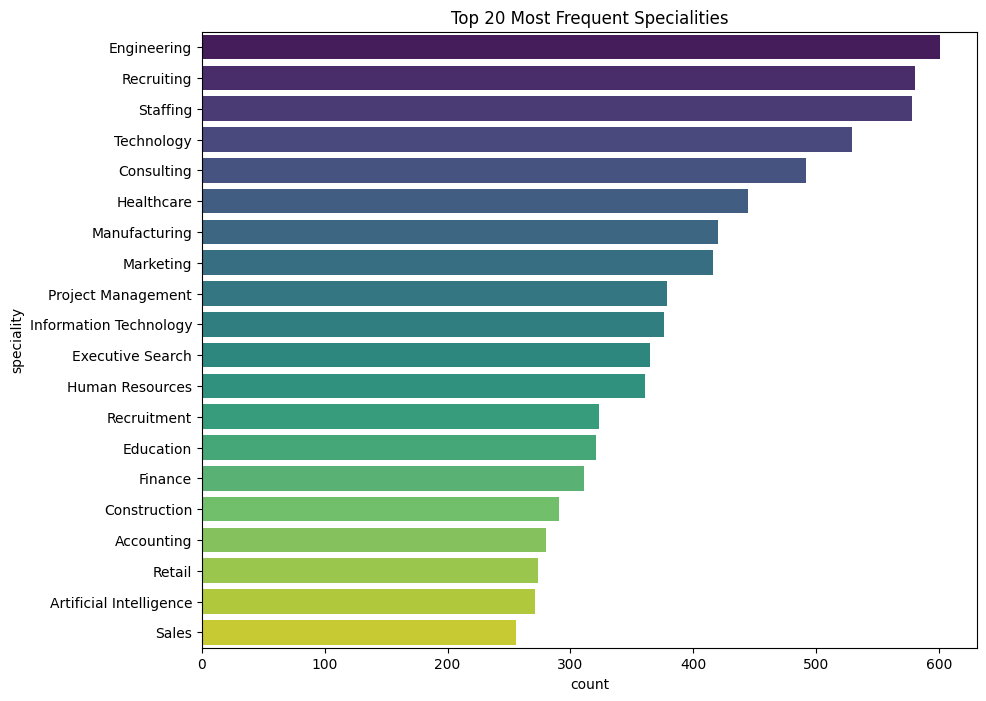

In [26]:
spl_freq = comp_spl["speciality"].value_counts().to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(spl_freq.iloc[:20,:], x="count", y="speciality", hue="speciality", palette="viridis",)
plt.title("Top 20 Most Frequent Specialities")
plt.show()

# Job Industries

In [30]:
job_ind = pd.read_csv("/workspaces/ITCS6190-Course-Project/data/jobs/job_industries.csv")
display(job_ind.info(), job_ind.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164808 entries, 0 to 164807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   job_id       164808 non-null  int64
 1   industry_id  164808 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB


None

,job_id,industry_id
0,3884428798,82
1,3887473071,48
2,3887465684,41
3,3887467939,82
4,3887467939,80


In [33]:
job_ind['industry_id'].value_counts()

industry_id
14      18326
27      11033
96      10396
104      9005
43       8535
        ...  
3199        1
616         1
2360        1
2163        1
799         1
Name: count, Length: 422, dtype: int64

In [34]:
ind_map = pd.read_csv('/workspaces/ITCS6190-Course-Project/data/mappings/industries.csv')
display(ind_map.info(),ind_map.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    422 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


None

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"


In [35]:
#drop the null values
ind_map = ind_map.dropna()
ind_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    388 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


In [36]:
#inner join with job_ind and ind_map on industry_id
job_ind_map = pd.merge(job_ind, ind_map, on='industry_id', how='inner')
display(job_ind_map.info(), job_ind_map.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164708 entries, 0 to 164707
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   job_id         164708 non-null  int64 
 1   industry_id    164708 non-null  int64 
 2   industry_name  164708 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.8+ MB


None

,job_id,industry_id,industry_name
0,3884428798,82,Book and Periodical Publishing
1,3887473071,48,Construction
2,3887465684,41,Banking
3,3887467939,82,Book and Periodical Publishing
4,3887467939,80,Advertising Services


Text(0.5, 1.0, 'Top 20 Most Frequent Industries in Job Postings')

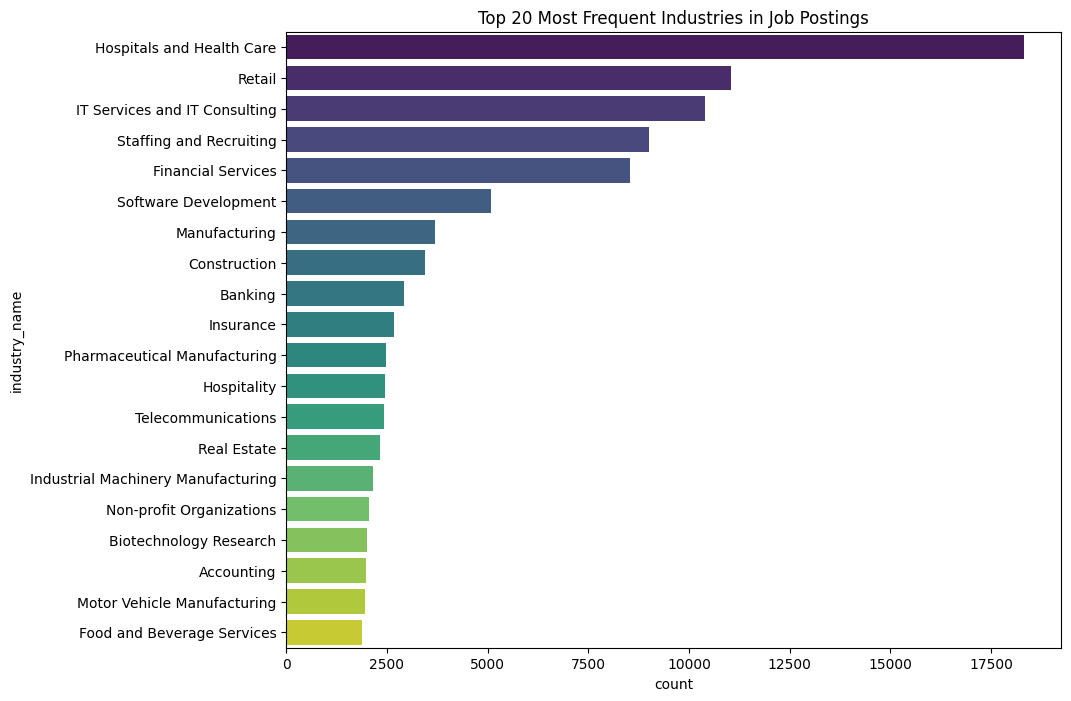

In [37]:
# plot the top 20 industries in job_ind_map
ind_freq = job_ind_map["industry_name"].value_counts().to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(ind_freq.iloc[:20,:], x="count", y="industry_name", hue="industry_name", palette="viridis",)
plt.title("Top 20 Most Frequent Industries in Job Postings")

# Job Skills

In [42]:
job_skill = pd.read_csv("/workspaces/ITCS6190-Course-Project/data/jobs/job_skills.csv")
display(job_skill.info(), job_skill.head(), job_skill['skill_abr'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213768 entries, 0 to 213767
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   job_id     213768 non-null  int64 
 1   skill_abr  213768 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


None

,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN


35

In [41]:
skill_map = pd.read_csv('/workspaces/ITCS6190-Course-Project/data/mappings/skills.csv')
display(skill_map.info(), skill_map.head(), skill_map["skill_name"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   skill_abr   35 non-null     object
 1   skill_name  35 non-null     object
dtypes: object(2)
memory usage: 692.0+ bytes


None

,skill_abr,skill_name
0,ART,Art/Creative
1,DSGN,Design
2,ADVR,Advertising
3,PRDM,Product Management
4,DIST,Distribution


35

In [43]:
# join job_skill and skill_map on skill_abr 
job_skill_map = pd.merge(job_skill, skill_map, on='skill_abr', how='inner')
display(job_skill_map.info(), job_skill_map.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213768 entries, 0 to 213767
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   job_id      213768 non-null  int64 
 1   skill_abr   213768 non-null  object
 2   skill_name  213768 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


None

,job_id,skill_abr,skill_name
0,3884428798,MRKT,Marketing
1,3884428798,PR,Public Relations
2,3884428798,WRT,Writing/Editing
3,3887473071,SALE,Sales
4,3887465684,FIN,Finance


/tmp/ipykernel_12894/2794221998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_skill_freq, y='skill_name', x='count', palette='viridis')


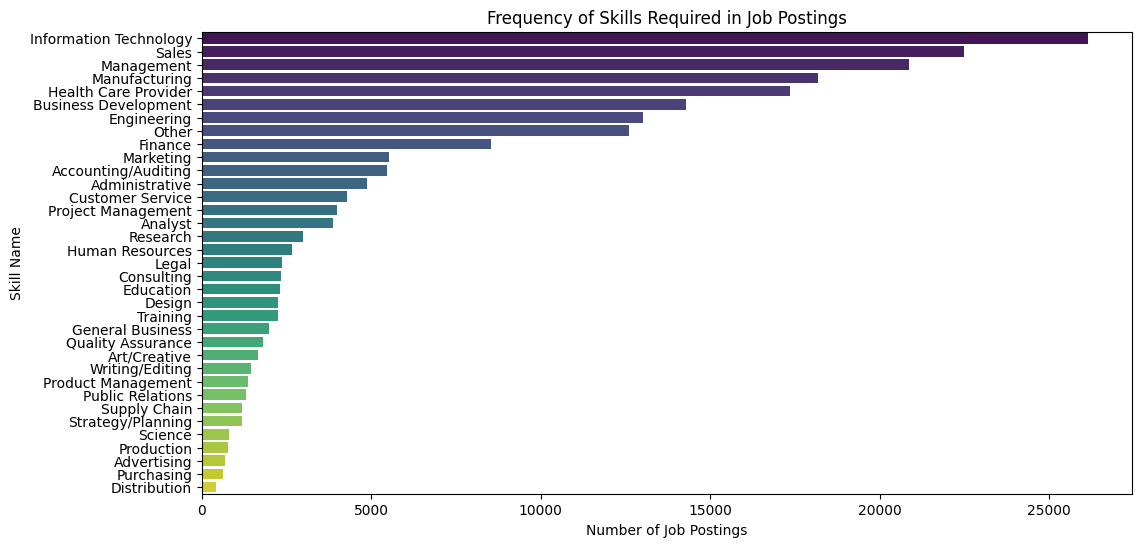

In [44]:
# freq plot of skills required in job postings
job_skill_freq = job_skill_map['skill_name'].value_counts().to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=job_skill_freq, y='skill_name', x='count', palette='viridis')
plt.title('Frequency of Skills Required in Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill Name')
plt.show()

# Postings

In [45]:
postings = pd.read_csv("/workspaces/ITCS6190-Course-Project/data/postings.csv")
display(postings.info(), postings.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

None

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


inflating: /workspaces/ITCS6190-Course-Project/data/jobs/job_skills.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/jobs/salaries.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/mappings/industries.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/mappings/skills.csv  
  inflating: /workspaces/ITCS6190-Course-Project/data/postings.csv  